<a href="https://colab.research.google.com/github/mayuresh-99/fintech-financial-models/blob/main/notebooks/Financial_Data_Analytics_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
Tickers = ['NVDA','META','GOOGL']
START_DATE = "2018-01-01"
END_DATE = None

In [3]:
def fetch_price_data(tickers,start,end=None):
    data = yf.download(
        tickers,
        start = start,
        end = end,
        auto_adjust= True,
        progress = False
    )['Close']
    return data.dropna()

In [4]:
prices = fetch_price_data(Tickers,START_DATE,END_DATE)
prices

Ticker,GOOGL,META,NVDA
Date,,,
2018-01-02,53.258095,180.161514,4.928534
2018-01-03,54.166729,183.388962,5.252899
2018-01-04,54.377140,183.051331,5.280588
2018-01-05,55.098194,185.553848,5.325337
2018-01-08,55.292728,186.973923,5.488510
...,...,...,...
2025-12-24,314.089996,667.549988,188.610001
2025-12-26,313.510010,663.289978,190.529999
2025-12-29,313.559998,658.690002,188.220001


In [5]:
df = pd.DataFrame(prices)
df

Ticker,GOOGL,META,NVDA
Date,,,
2018-01-02,53.258095,180.161514,4.928534
2018-01-03,54.166729,183.388962,5.252899
2018-01-04,54.377140,183.051331,5.280588
2018-01-05,55.098194,185.553848,5.325337
2018-01-08,55.292728,186.973923,5.488510
...,...,...,...
2025-12-24,314.089996,667.549988,188.610001
2025-12-26,313.510010,663.289978,190.529999
2025-12-29,313.559998,658.690002,188.220001


In [6]:
def validate_prices_data(data):
  assert not data.isnull().any().any(),"Missing Values Detected"
  assert data.index.is_monotonic_increasing, "Dates not Sorted"
  assert (data > 0).all().all(), "Non-Positive Values Detected"

validate_prices_data(df)

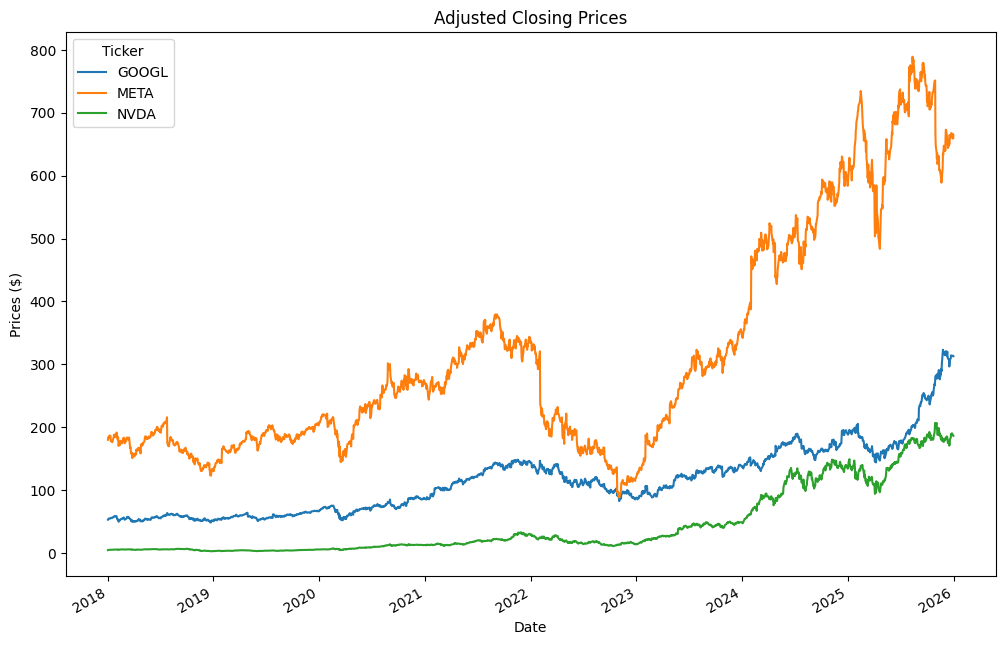

In [7]:
df.plot(figsize=(12,8),title = "Adjusted Closing Prices")
plt.ylabel("Prices ($)")
plt.show()


In [8]:
def compute_log_returns(data):

  data = np.log(data/data.shift(1))
  return data.dropna()

returns = compute_log_returns(df)
returns

Ticker,GOOGL,META,NVDA
Date,,,
2018-01-03,0.016917,0.017756,0.063739
2018-01-04,0.003877,-0.001843,0.005257
2018-01-05,0.013173,0.013579,0.008439
2018-01-08,0.003524,0.007624,0.030181
2018-01-09,-0.001275,-0.002180,-0.000270
...,...,...,...
2025-12-24,-0.000827,0.003917,-0.003176
2025-12-26,-0.001848,-0.006402,0.010128
2025-12-29,0.000159,-0.006959,-0.012198


In [28]:
import pandas as pd
TRADING_DAYS = 252
def annualized_return_volatility(data_returns):

  annual_returns = TRADING_DAYS * data_returns.mean()
  annual_volatility = np.sqrt(TRADING_DAYS) * data_returns.std()

  return pd.DataFrame({
        "Annual Return": annual_returns,
        "Annual Volatility": annual_volatility
    })

In [29]:
metrics = annualized_return_volatility(returns)
metrics

,Annual Return,Annual Volatility
Ticker,,
GOOGL,0.222043,0.309886
META,0.162800,0.418784
NVDA,0.455529,0.512430


In [15]:
def rolling_volatility(data_returns , window=30):
    return data_returns.rolling(window).std()*np.sqrt(TRADING_DAYS)

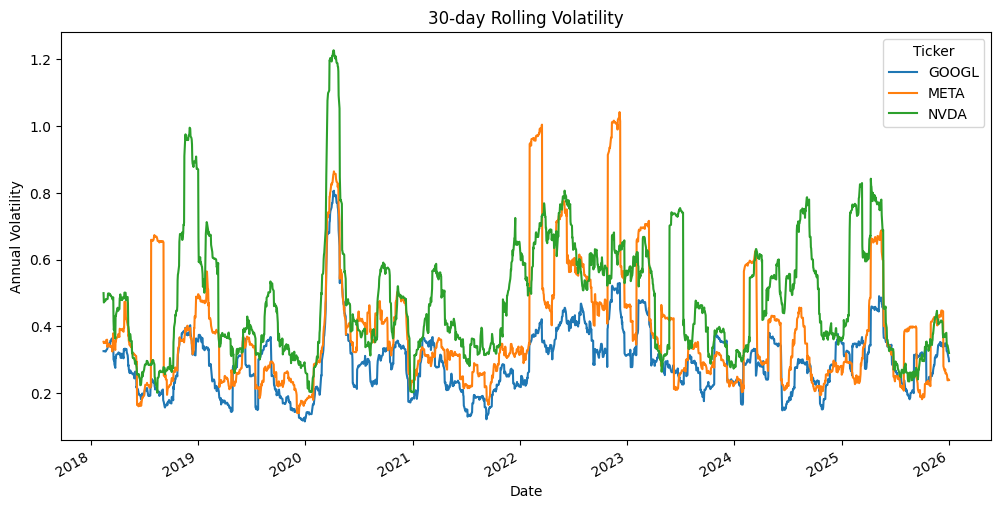

In [16]:
rolling_volatility = rolling_volatility(returns)

rolling_volatility.plot(figsize=(12,6) , title = "30-day Rolling Volatility")
plt.ylabel("Annual Volatility")
plt.show()

In [18]:
def compute_drawdown(data_returns):
  cumulative_max = data_returns.cummax()
  drawdown = (data_returns - cumulative_max)/cumulative_max
  return drawdown

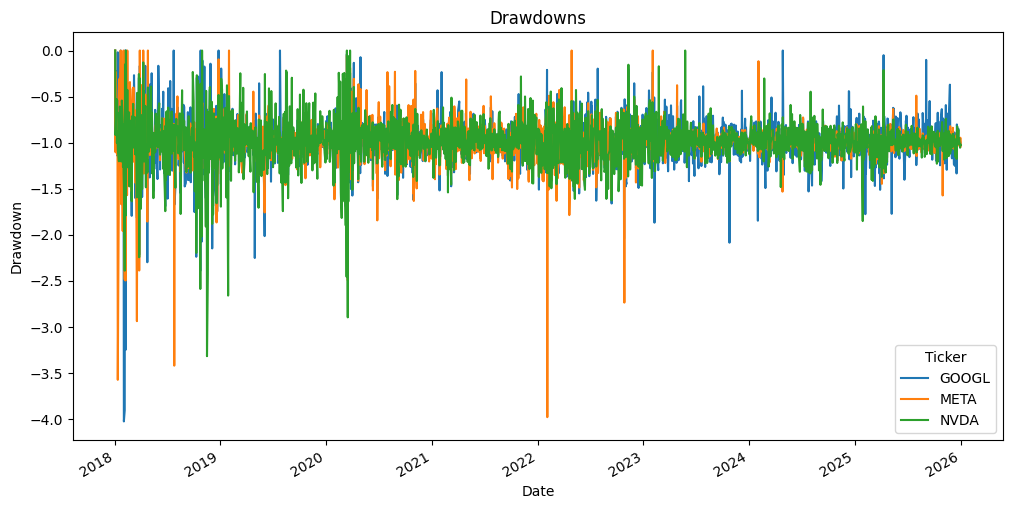

In [19]:
drawdown = compute_drawdown(returns)

drawdown.plot(figsize = (12,6), title = "Drawdowns")
plt.ylabel('Drawdown')
plt.show()

In [20]:
def correlation_matrix(data_returns):
  return data_returns.corr()

In [21]:
corr = correlation_matrix(returns)
corr

Ticker,GOOGL,META,NVDA
Ticker,,,
GOOGL,1.000000,0.605394,0.579002
META,0.605394,1.000000,0.521430
NVDA,0.579002,0.521430,1.000000


In [30]:
class RiskAnalytics:
  def __init__(self,df):
      self.df = df
      self.returns = compute_log_returns(df)
  def summary(self):
      metrics = annualized_return_volatility(self.returns)
      metrics["Max Drawdown"] = compute_drawdown(self.df).min()
      return metrics


In [31]:
analytics = RiskAnalytics(df)
analytics.summary()

,Annual Return,Annual Volatility,Max Drawdown
Ticker,,,
GOOGL,0.222043,0.309886,-0.443200
META,0.162800,0.418784,-0.767361
NVDA,0.455529,0.512430,-0.663351
